In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mayavi import mlab
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [5]:
left_face_points_real = {
    1:[9, 0, 0],
    2:[8.4, 0, 9.75],
    3:[9, 0, 11],
    4:[7, 0, 1],
    5:[6.85, 0, 4.5],
    6:[6.75, 0, 9.3],
    7:[5.4, 0, 6.4],
    8:[5, 0, 1.6],
    9:[3.5, 0, 2.4],
    10:[3.1, 0, 7.2],
    11:[2, 0, 9.5],
    12:[2.5, 0, 0.6],
    13:[1.5, 0, 2.8],
    14:[0.5, 0, 5],
    15:[0, 0, 11]
}

front_face_points_real = {
    1:[8.5, 0.3, 11],
    2:[7.5, 4, 11],
    3:[8, 10.75, 11],
    4:[8.5, 15, 11],
    5:[7.5, 20.4, 11],
    6:[6, 0.6, 11],
    7:[6, 7, 11],
    8:[6, 15.25, 11],
    9:[6.25, 17.25, 11],
    10:[5.25, 21.7, 11],
    11:[3.4, 2, 11],
    12:[3.2, 5.5, 11],
    13:[2.2, 6.9, 11],
    14:[3, 14.8, 11],
    15:[3.5, 19.2, 11],
    16:[2.8, 21.5, 11],
    17:[0.8, 0.3, 11],
    18:[1.3, 4.4, 11],
    19:[1, 11.25, 11],
    20:[0.9, 14.75, 11],
    21:[2, 17.75, 11],
    22:[0.6, 2.2, 11],
    23:[8.5, 22.5, 11]
}

right_face_points_real = {
    1:[9, 23, 11],
    2:[7.8, 23, 8],
    3:[7.25, 23, 6.4],
    4:[7.8, 23, 1.5],
    5:[9, 23, 0],
    6:[4.5, 23, 10],
    7:[4.4, 23, 6.8],
    8:[4.6, 23, 4.5],
    9:[5.9, 23, 2.6],
    10:[4.3, 23, 2.2],
    11:[0, 23, 11],
    12:[0.8, 23, 9.5],
    13:[0.6, 23, 6.2],
    14:[2.2, 23, 5.1],
    15:[2, 23, 1.6],
    16:[0, 23, 0]
}

up_face_points_real = {
    1:[9, 2, 1.25],
    2:[9, 5.25, 0.75],
    3:[9, 11, 2.75],
    4:[9, 12.5, 1.25],
    5:[9, 17.5, 1.75],
    6:[9, 20.75, 2.25],
    7:[9, 21.75, 0.5],
    8:[9, 0.5, 5.75],
    9:[9, 3.75, 5.75],
    10:[9, 19.25, 5.75],
    11:[9, 21.75, 4.5],
    12:[9, 2, 9],
    13:[9, 5.5, 9.5],
    14:[9, 7.5, 7.75],
    15:[9, 9.75, 9.75],
    16:[9, 16, 9.75],
    17:[9, 18.75, 9.75],
    18:[9, 21.25, 9.75],
    19:[9, 0.25, 10.75],
    20:[9, 3, 10.75],
    21:[9, 22.5, 11],
    22:[9, 0, 0],
    23:[9, 22.5, 0]
}

print(len(left_face_points_real) + len(front_face_points_real) + len(up_face_points_real))

61


In [6]:
def get_real_matched_points(real_points, image_points):
  matched_points = {}
  for key in image_points:
    matched_points[key] = real_points[key]
  return matched_points

In [7]:
image0_left_points = {
  1:[969, 1694],
  2:[1710, 1973],
  3:[1871, 1966],
  4:[1042, 1887],
  5:[1306, 1992],
  6:[1702, 2135],
  7:[1443, 2176],
  8:[1075, 2088],
  9:[1167, 2237],
  10:[1534, 2409],
  11:[1725, 2586],
  12:[1084, 2342],
  13:[1225, 2398],
  14:[1384, 2531],
  15:[1877, 2780]
}

image0_front_points = {
    1:[1894, 1982],
    2:[2096, 1893],
    3:[2360, 1646],
    4:[2488, 1496],
    5:[2620, 1448],
    6:[1903, 2214],
    7:[2230, 1912],
    8:[2486, 1670],
    9:[2537, 1613],
    10:[2631, 1580],
    11:[1991, 2384],
    12:[2154, 2225],
    13:[2209, 2193],
    14:[2464, 1892],
    15:[2574, 1740],
    16:[2617, 1735],
    17:[1903, 2698],
    18:[2104, 2430],
    19:[2352, 2136],
    20:[2463, 2007],
    21:[2537, 1863],
    22:[2612, 1839],
    23:[2662, 1340]
}

image0_up_points = {
    1:[1190, 1650],
    2:[1373, 1548],
    8:[1422, 1798],
    9:[1621, 1680],
    12:[1782, 1809],
    13:[2004, 1689],
    14:[1960, 1589],
    15:[2212, 1567],
    16:[2410, 1424],
    17:[2483, 1382],
    18:[2544, 1342],
    19:[1858, 1932],
    20:[2002, 1821],
    21:[2663, 1340]
}

image0_left_points_list = list(image0_left_points.values())
image0_front_points_list = list(image0_front_points.values())
image0_up_points_list = list(image0_up_points.values())

image0_points = image0_left_points_list + image0_front_points_list + image0_up_points_list
print(len(image0_points))



52


In [8]:
image1_left_points = {
    1:[1100, 1561],
    2:[1574, 1996],
    3:[1691, 2032],
    4:[1137, 1748],
    5:[1303, 1906],
    6:[1567, 2144],
    7:[1398, 2108],
    8:[1162, 1931],
    9:[1227, 2080],
    10:[1469, 2339],
    11:[1593, 2543],
    12:[1190, 2150],
    13:[1274, 2232],
    14:[1373, 2380],
    15:[1717, 2767],
};

image1_front_points = {
  1:[1729, 2054],
  2:[2049, 1965],
  3:[2499, 1711],
  4:[2738, 1547],
  5:[2975, 1490],
  6:[1744, 2264],
  7:[2267, 1979],
  8:[2719, 1733],
  9:[2812, 1670],
  10:[2989, 1629],
  11:[1878, 2423],
  12:[2135, 2278],
  13:[2226, 2251],
  14:[2667, 1960],
  15:[2872, 1801],
  16:[2955, 1792],
  17:[1752, 2696],
  18:[2053, 2468],
  19:[2468, 2199],
  20:[2664, 2070],
  21:[2798, 1930],
  22:[2955, 1896],
  23:[3070, 1367]
 }

image1_up_points = {
    1:[1311, 1539],
    2:[1547, 1447],
    8:[1407, 1751],
    9:[1666, 1641],
    12:[1720, 1830],
    13:[2028, 1722],
    14:[2054, 1593],
    15:[2338, 1604],
    16:[2685, 1447],
    17:[2809, 1400],
    18:[2919, 1355],
    19:[1703, 1993],
    20:[1927, 1884],
    21:[3070, 1367]
 }

image1_left_points_list = list(image1_left_points.values())
image1_front_points_list = list(image1_front_points.values())
image1_up_points_list = list(image1_up_points.values())

image1_points = image0_left_points_list + image1_front_points_list + image1_up_points_list
print(len(image1_points))


52


In [9]:
image0_left_real_matched_points = get_real_matched_points(left_face_points_real, image0_left_points)
image0_front_real_matched_points = get_real_matched_points(front_face_points_real, image0_front_points)
image0_up_real_matched_points = get_real_matched_points(up_face_points_real, image0_up_points)

image0_points = list(image0_left_points.values()) + list(image0_front_points.values()) + list(image0_up_points.values())

image0_real_points = list(image0_left_real_matched_points.values()) + list(image0_front_real_matched_points.values()) + list(image0_up_real_matched_points.values())

print(len(image0_points))

52


In [10]:
image1_left_real_matched_points = get_real_matched_points(left_face_points_real, image1_left_points)
image1_front_real_matched_points = get_real_matched_points(front_face_points_real, image1_front_points)
image1_up_real_matched_points = get_real_matched_points(up_face_points_real, image1_up_points)

image1_points = list(image1_left_points.values()) + list(image1_front_points.values()) + list(image1_up_points.values())

image1_real_points = list(image1_left_real_matched_points.values()) + list(image1_front_real_matched_points.values()) + list(image1_up_real_matched_points.values())
print(len(image1_points))

52


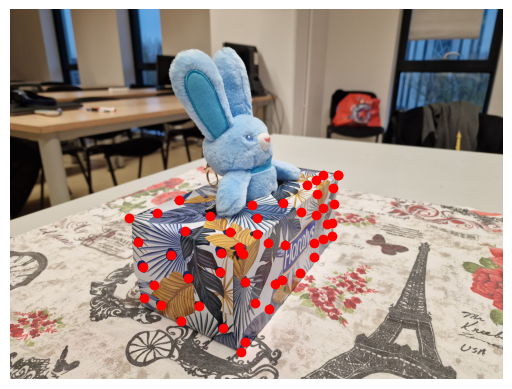

In [11]:
image0 = cv2.imread("image0.jpg")
image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image0)
points = np.array(image0_points)

# Scatter plot the points on the image
plt.scatter(points[:, 0], points[:, 1], color='red', marker='o')
plt.axis('off')  # Turn off axis labels
plt.show()

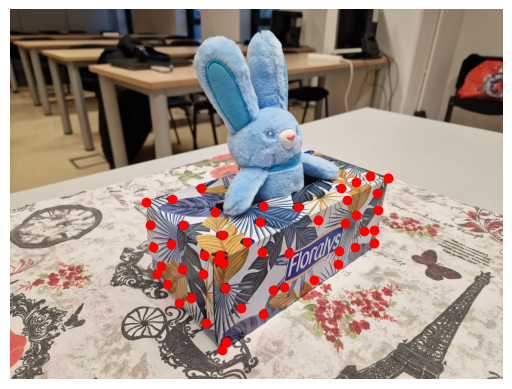

In [12]:
image1 = cv2.imread("image1.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image1)
points = np.array(image1_points)

# Scatter plot the points on the image
plt.scatter(points[:, 0], points[:, 1], color='red', marker='o')
plt.axis('off')  # Turn off axis labels
plt.show()

SVD Image 0 Calibration Matrix

In [14]:
A_linear_image0 = []
for i in range(len(image0_points)):
    X, Y, Z = image0_real_points[i]
    u, v = image0_points[i]
    A_linear_image0.append([0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v])
    A_linear_image0.append([X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u])

A_linear_image0 = np.array(A_linear_image0)
_, _, Vt_linear = np.linalg.svd(A_linear_image0)
image0_calibration_matrix = Vt_linear[-1, :].reshape(3, 4)

print(image0_calibration_matrix)

[[-1.84935946e-02  2.87681021e-02 -1.46876993e-02  4.71823965e-01]
 [-3.57998914e-02  1.12955840e-02 -3.84457121e-02  8.79266374e-01]
 [-9.15585701e-06  9.73532740e-06 -2.06057721e-05  3.85021196e-04]]


SVD Image 1 Calibration Matrix

In [15]:
A_linear_image1 = []
for i in range(len(image1_points[:6])):
    X, Y, Z = image1_real_points[i]
    u, v = image1_points[i]
    A_linear_image1.append([X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u])
    A_linear_image1.append([0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v])

A_linear_image1_array = np.array(A_linear_image1)
_, _, Vt_linear = np.linalg.svd(A_linear_image1_array)
image1_calibration_matrix = Vt_linear[-1, :].reshape(3, 4)

print(image1_calibration_matrix)

[[ 3.03796387e-28  4.90316847e-17 -2.70701993e-28 -7.64967209e-29]
 [-4.94482582e-29 -1.67583604e-12  1.24298902e-28  9.33925794e-28]
 [ 8.62816615e-32  1.00000000e+00 -4.31408308e-32  2.50370893e-31]]


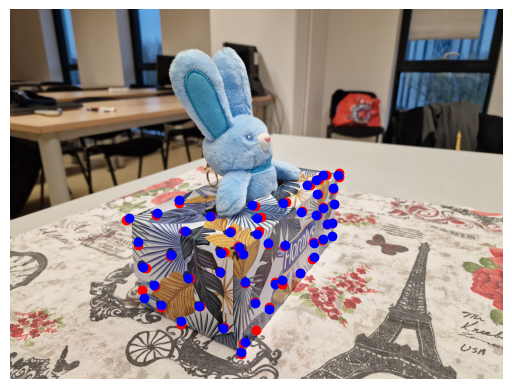

In [16]:
A_linear_image0 = []
for i in range(len(image0_points[:34])):
    X, Y, Z = image0_real_points[i]
    u, v = image0_points[i]
    A_linear_image0.append([0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v])
    A_linear_image0.append([X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u])

A_linear_image0 = np.array(A_linear_image0)
A_linear_image0_array = np.array(A_linear_image0)
ATA = np.matmul(A_linear_image0_array.T, A_linear_image0_array)
eigenvalues, eigenvectors = np.linalg.eig(ATA)

# Get the corresponding eigenvector
min_eigenvalue_index = np.argmin(eigenvalues)

# Get the corresponding eigenvector
image0_min_eigenvector = eigenvectors[:, min_eigenvalue_index]

image0_min_eigenvector = image0_min_eigenvector.reshape((3,4))

for i in range(len(image0_points)):
  test_point = image0_real_points[i] + [1]
  PX = image0_min_eigenvector @ test_point
  # print(PX)
  if PX[2] != 0:
      PX[0] /= PX[2]
      PX[1] /= PX[2]
      plt.scatter(x=PX[0], y=PX[1], c='red')
      plt.scatter(x=image0_points[i][0], y=image0_points[i][1], c='blue')
  else:
      print("Warning: Division by zero avoided for point", i)

plt.imshow(image0)
plt.axis('off')  # Turn off axis labels
plt.show()

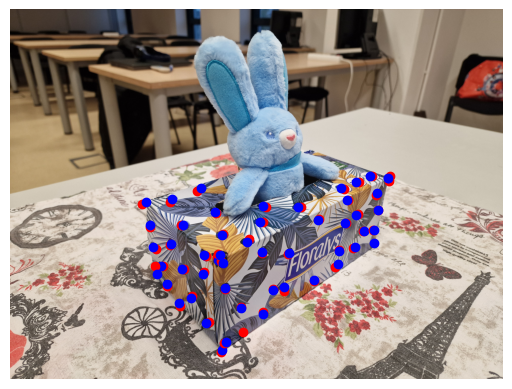

In [17]:
A_linear_image1 = []
for i in range(len(image1_points[:34])):
    X, Y, Z = image1_real_points[i]
    u, v = image1_points[i]
    A_linear_image1.append([0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v])
    A_linear_image1.append([X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u])

A_linear_image1 = np.array(A_linear_image1)
A_linear_image1_array = np.array(A_linear_image1)
ATA = np.matmul(A_linear_image1_array.T, A_linear_image1_array)
eigenvalues, eigenvectors = np.linalg.eig(ATA)

min_eigenvalue_index = np.argmin(eigenvalues)

image1_min_eigenvector = eigenvectors[:, min_eigenvalue_index]

image1_min_eigenvector = image1_min_eigenvector.reshape((3,4))

for i in range(len(image1_points)):
  test_point = image1_real_points[i] + [1]
  PX = image1_min_eigenvector @ test_point
  if PX[2] != 0:
      PX[0] /= PX[2]
      PX[1] /= PX[2]
      plt.scatter(x=PX[0], y=PX[1], c='red')
      plt.scatter(x=image1_points[i][0], y=image1_points[i][1], c='blue')
  else:
      print("Warning: Division by zero avoided for point", i)

plt.imshow(image1)
plt.axis('off')  # Turn off axis labels
plt.show()

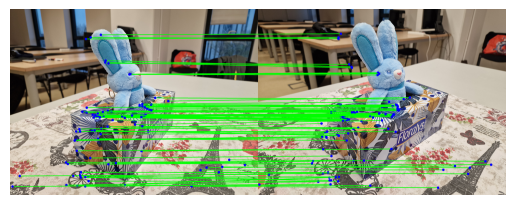

In [18]:
def optical_flow(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # params for corner detection
    feature_params = dict( maxCorners = 100,
                        qualityLevel = 0.3,
                        minDistance = 7,
                        blockSize = 7 )

    # Parameters for lucas kanade optical flow
    lk_params = dict( winSize = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                              10, 0.03))

    # Perform Shi-Tomasi corner detection on the first frame
    corners1 = cv2.goodFeaturesToTrack(gray1, mask = None,
                             **feature_params)

    # Calculate optical flow using Lucas-Kanade method
    corners2, status, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, corners1, None,  **lk_params)

    good_new = corners2[status == 1]
    good_old = corners1[status == 1]

    img_concat = np.concatenate((img1, img2), axis=1)

    for i, (new, old) in enumerate(zip(good_new, good_old)):
      a, b = new.ravel().astype(int)
      c, d = old.ravel().astype(int)
      c += img1.shape[1]  # Offset by the width of the first image

      cv2.line(img_concat, (a, b), (c, d), (0, 255, 0), 10)
      cv2.circle(img_concat, (a, b), 20, (0, 0, 255), -1)
      cv2.circle(img_concat, (c, d), 20, (0, 0, 255), -1)

    plt.imshow(img_concat)
    plt.axis('off')  # Turn off axis labels
    plt.show()



# Get the result with optical flow
optical_flow(image0, image1)

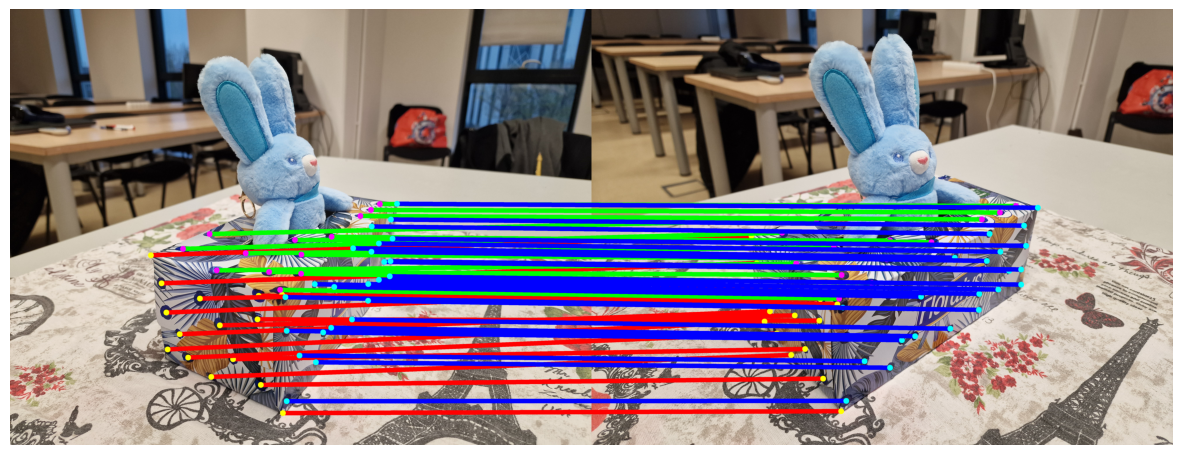

In [19]:
def get_correspondences(image0, image1):
    img_concat = np.concatenate((image0, image1), axis=1)

    for i in image0_left_points:
      x1, y1 = image0_left_points[i]
      x2, y2 = image1_left_points[i]
      x2 += image0.shape[1]
      cv2.line(img_concat, (x1, y1), (x2, y2), (255, 0, 0), 30)
      cv2.circle(img_concat, (x1, y1), 20, (255, 255, 0), -1)
      cv2.circle(img_concat, (x2, y2), 20, (255, 255, 0), -1)

    for i in image0_up_points:
      x1, y1 = image0_up_points[i]
      x2, y2 = image1_up_points[i]
      x2 += image0.shape[1]
      cv2.line(img_concat, (x1, y1), (x2, y2), (0, 255, 0), 30)
      cv2.circle(img_concat, (x1, y1), 20, (255, 0, 255), -1)
      cv2.circle(img_concat, (x2, y2), 20, (255, 0, 255), -1)

    for i in image0_front_points:
      x1, y1 = image0_front_points[i]
      x2, y2 = image1_front_points[i]
      x2 += image0.shape[1]
      cv2.line(img_concat, (x1, y1), (x2, y2), (0, 0, 255), 30)
      cv2.circle(img_concat, (x1, y1), 20, (0, 255, 255), -1)
      cv2.circle(img_concat, (x2, y2), 20, (0, 255, 255), -1)

    plt.figure(figsize=(15, 7))
    plt.imshow(img_concat)
    plt.axis('off')  # Turn off axis labels
    plt.show()

get_correspondences(image0, image1)


In [55]:
def linear_triangulation(P1, P2):
  points_3d = []
  for i in image0_left_points:
    x1, y1 = image0_left_points[i]
    x2, y2 = image1_left_points[i]
    A = np.zeros((4, 4))
    A[0] = x1 * P1[2] - P1[0]
    A[1] = y1 * P1[2] - P1[1]
    A[2] = x2 * P2[2] - P2[0]
    A[3] = y2 * P2[2] - P2[1]
    _, _, V = np.linalg.svd(A)
    point_3d_homogeneous = V[-1, :3] / V[-1, 3]
    points_3d.append(point_3d_homogeneous)

  for i in image0_up_points:
      x1, y1 = image0_up_points[i]
      x2, y2 = image1_up_points[i]
      A = np.zeros((4, 4))
      A[0] = x1 * P1[2] - P1[0]
      A[1] = y1 * P1[2] - P1[1]
      A[2] = x2 * P2[2] - P2[0]
      A[3] = y2 * P2[2] - P2[1]
      _, _, V = np.linalg.svd(A)
      point_3d_homogeneous = V[-1, :3] / V[-1, 3]
      points_3d.append(point_3d_homogeneous)

  for i in image0_front_points:
      x1, y1 = image0_front_points[i]
      x2, y2 = image1_front_points[i]
      A = np.zeros((4, 4))
      A[0] = x1 * P1[2] - P1[0]
      A[1] = y1 * P1[2] - P1[1]
      A[2] = x2 * P2[2] - P2[0]
      A[3] = y2 * P2[2] - P2[1]
      _, _, V = np.linalg.svd(A)
      point_3d_homogeneous = V[-1, :3] / V[-1, 3]
      points_3d.append(point_3d_homogeneous)

  return np.array(points_3d)


triangulated_points = linear_triangulation(image0_min_eigenvector, image1_min_eigenvector)


print(triangulated_points.shape)

(52, 3)


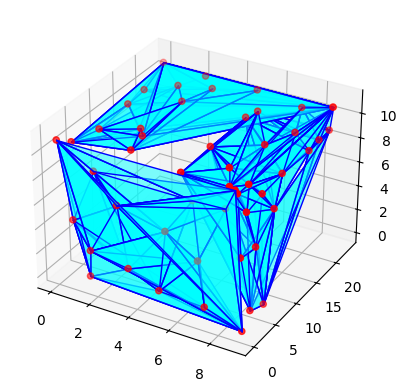

In [61]:
# Perform Delaunay triangulation
triangles1 = Delaunay(triangulated_points[:15])
triangles2 = Delaunay(triangulated_points[15:38])
triangles3 = Delaunay(triangulated_points[38:])

# Plot the 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(triangulated_points[:, 0], triangulated_points[:, 1], triangulated_points[:, 2], c='r', marker='o')

# Plot the mesh
for simplex in triangles1.simplices:
    polygon = Poly3DCollection([triangulated_points[simplex]], facecolors='cyan', edgecolors='b', alpha=0.5)
    ax.add_collection3d(polygon)

for simplex in triangles2.simplices:
    polygon = Poly3DCollection([triangles2.points[simplex]], facecolors='cyan', edgecolors='b', alpha=0.5)
    ax.add_collection3d(polygon)

for simplex in triangles3.simplices:
    polygon = Poly3DCollection([triangles3.points[simplex]], facecolors='cyan', edgecolors='b', alpha=0.5)
    ax.add_collection3d(polygon)
plt.show()

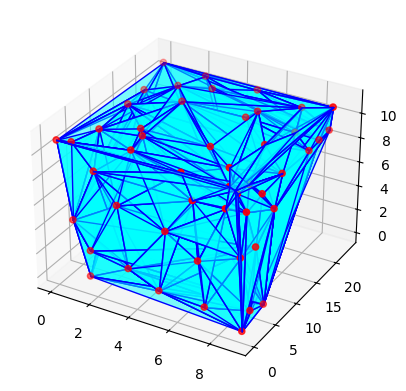

In [63]:
# Perform Delaunay triangulation
triangles = Delaunay(triangulated_points)

# Plot the 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(triangulated_points[:, 0], triangulated_points[:, 1], triangulated_points[:, 2], c='r', marker='o')

# Plot the mesh
for simplex in triangles.simplices:
    polygon = Poly3DCollection([triangulated_points[simplex]], facecolors='cyan', edgecolors='b', alpha=0.5)
    ax.add_collection3d(polygon)

plt.show()

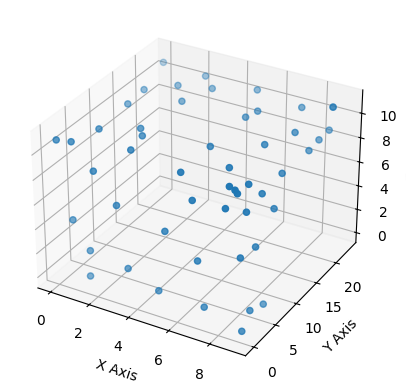

In [60]:
x, y, z = zip(*triangulated_points)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Show the plot
plt.show()